<a href="https://colab.research.google.com/github/Danalmestadi/T5-WeekFive/blob/main/RNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RNN Introduction**


## Importing required libraries


In [1]:
!pip install mplfinance
!pip install opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [6]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [7]:
df.drop('ID', axis=1, inplace=True)


## Visualization

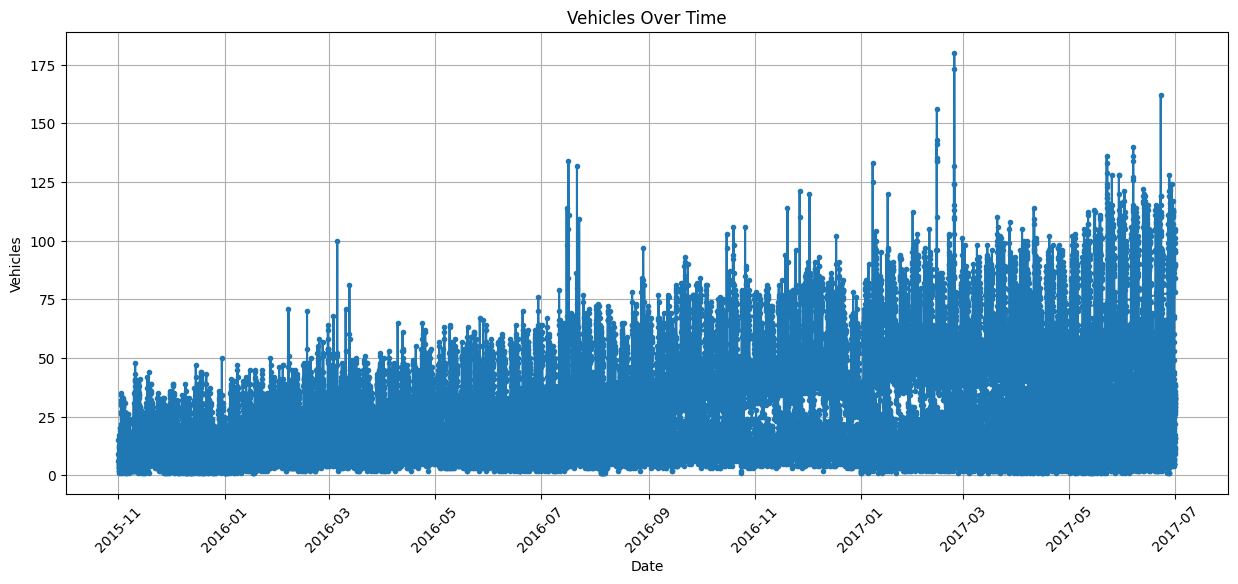

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.title('Vehicles Over Time')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
scaler = MinMaxScaler()
df['Vehicles'] = scaler.fit_transform(df['Vehicles'].values.reshape(-1,1))

In [10]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

In [11]:
sequence_length = 10
X = create_sequences(df['Vehicles'], sequence_length)
y = df['Vehicles'][sequence_length:].values

## Split the data into train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling


In [14]:
# Initialize a sequential model
model = Sequential()

# First RNN layer with 50 units, input shape, and return sequences
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#model.add(Dropout(0.2))         # Adding dropout to prevent overfitting
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=50))
#model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1),)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 10, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 10, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),callbacks= [early_stopping])

Epoch 1/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 0.0063 - val_loss: 8.3535e-04
Epoch 2/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 8.3832e-04 - val_loss: 8.0579e-04
Epoch 3/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 8.2591e-04 - val_loss: 7.9637e-04
Epoch 4/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 8.2577e-04 - val_loss: 8.4177e-04
Epoch 5/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 8.0804e-04 - val_loss: 9.1894e-04
Epoch 6/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 8.3320e-04 - val_loss: 7.9102e-04
Epoch 7/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 8.3584e-04 - val_loss: 8.5100e-04
Epoch 8/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 7.9370e-04 - val_loss: 7.9010e-04
Epoch 9/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 8.1074e-04 - val_loss: 7.9134e-04
Epoch 10/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - loss: 8.4372e-04 - val_loss: 8.1407e-04
Epoch 11/50
1203/1203 ━

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Visualization of results


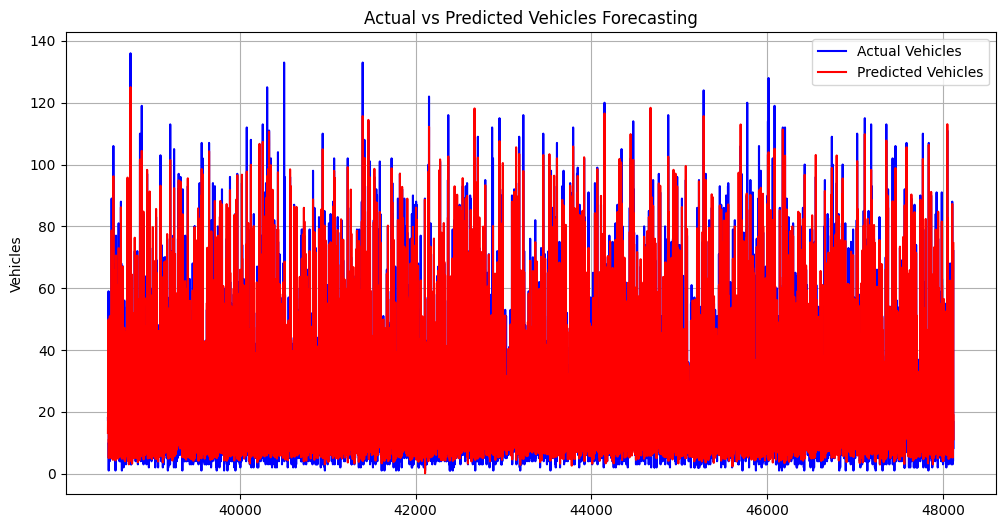

In [18]:
plt.figure(figsize=(12, 6))

y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_denormalized = scaler.inverse_transform(test_predict)

plt.plot(df.index[-len(y_test_denormalized):], y_test_denormalized, label='Actual Vehicles', color='b')
plt.plot(df.index[-len(predictions_denormalized):], predictions_denormalized, label='Predicted Vehicles', color='r')

plt.xlabel('')
plt.ylabel('Vehicles')
plt.title('Actual vs Predicted Vehicles Forecasting')
plt.legend()
plt.grid(True)
plt.show()